In [1]:
import pickle
from natsort import natsorted

basedir = '../../ImageNomer/data/anton/cohorts/BSNIP'
demoname = f'{basedir}/demographics.pkl'

with open(demoname, 'rb') as f:
    demo = pickle.load(f)
    
subs = natsorted(list(demo['Age_cal'].keys()))
print(len(subs))

1244


In [93]:
import numpy as np

task = 'unk'
x = []
y = []
sex = []
race = []
lookup = dict(SZP=0, SZR=1, SADP=2, SADR=3, BPP=4, BPR=5, NC=6)
lookup_race = dict(AA=1, CA=2)
lookup_sex = {'s1.0': 1, 's2.0': 2}

for sub in subs:
    if demo['DXGROUP_2'][sub] not in lookup.keys():
        continue
    p = np.load(f'{basedir}/fc/{sub}_task-{task}_fc.npy')
    x.append(p)
    y.append(lookup[demo['DXGROUP_2'][sub]])
    r = demo['Race'][sub]
    r = lookup_race[r] if r in lookup_race else 0
    race.append(r)
    s = demo['sex'][sub]
    s = lookup_sex[s] if s in lookup_sex else 0
    sex.append(s)
    
x = np.stack(x)
y = np.array(y).astype('int')
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')

print(x.shape)
print(y.shape)
print(y)

(1244, 34716)
(1244,)
[0 0 6 ... 1 1 3]


In [99]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

def cat(lst):
    return np.concatenate(lst)

def rand_idcs(n):
    return np.random.permutation(n)   

def get_group(x, y, z, group, n, nt):
    sel = y == group
    x = x[sel]
    y = y[sel]
    z = z[sel]
    i = rand_idcs(x.shape[0])
    return x[i][:n], x[i][n:n+nt], y[i][:n], y[i][n:n+nt], z[i][:n], z[i][n:n+nt]

def get_groups(x, y, z, groups, n, nt):
    xxtr, xxt = [], []
    yytr, yyt = [], []
    zztr, zzt = [], []
    for g in groups:
        xtr, xt, ytr, yt, ztr, zt = get_group(x, y, z, g, n, nt)
        for a,b in zip([xxtr, xxt, yytr, yyt, zztr, zzt], [xtr, xt, ytr, yt, ztr, zt]):
            a.append(b)
    return [cat(a) for a in [xxtr, xxt, yytr, yyt, zztr, zzt]]

accs = []

class Logistic(nn.Module):
    def __init__(self, dim):
        super(Logistic, self).__init__()
        self.fc = nn.Linear(dim,2).float().cuda()
        
    def reg_loss(self, C):
        return rmse(self.fc.weight, 0)
        
    def forward(self, x):
        return F.softmax(self.fc(x).squeeze(), dim=-1)


for _ in range(50):
    
    xtr, xt, ytr, yt, ztr, zt = get_groups(x, y, sex, [0,1,3,5,6], 100, 50)
    xtr, xt, ytr = [torch.from_numpy(a).float().cuda() for a in [xtr, xt, ytr]]
    ytr = F.one_hot((ytr == 0).long()).float()
    
    clf = Logistic(xtr.shape[-1])
    optim = torch.optim.Adam(clf.parameters(), lr=1e-4, weight_decay=1e-3)

    ce = nn.CrossEntropyLoss()

    for epoch in range(2000):
        optim.zero_grad()
        yhat = clf(xtr)
        loss = ce(yhat, ytr)
        loss.backward()
        optim.step()
#         if epoch % 200 == 0:
#             print(f'{float(loss)}')

    # Training
    yhat = clf(xt)
    sel = np.any([zt == 2], axis=0)
    yhat = yhat[sel]
    yhat = torch.argmax(yhat, axis=-1)
    yhat = yhat.detach().cpu().numpy()
#     print(np.sum(sel))
    acc = np.mean(yhat == (yt == 0)[sel])
    print(acc)
    accs.append(acc)
    
    w = clf.fc.weight.detach().cpu().numpy()
    ww = w[0]
    wb = w[1]
    
print('---')
print(np.mean(accs))
print(np.std(accs))

0.9064748201438849
0.8571428571428571
0.8561151079136691
0.9051094890510949
0.8482758620689655
0.8928571428571429


KeyboardInterrupt: 

In [15]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


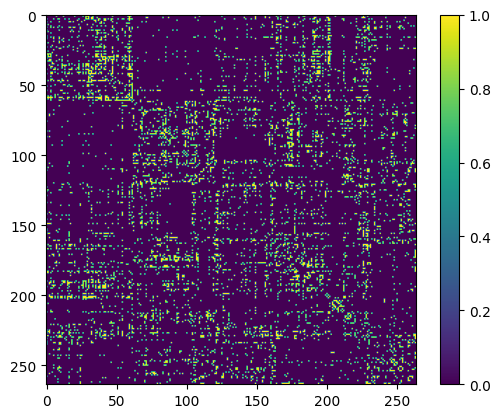

In [40]:
import matplotlib.pyplot as plt

w = clf.fc.weight.detach().cpu().numpy()
ww = w[0]

ww = ww*np.mean(xx, axis=0)

plt.imshow(remap(vec2mat(ww))<-0.0025)
plt.colorbar()
plt.show()